<a href="https://colab.research.google.com/github/kyungmin0101/medical_ai/blob/main/240219/MedicalAI_classification_0219_kgh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import glob
import csv
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/MedicalAI/Refractive Index Measurements New/1stSeries_07.05.21/*/{}*".format('W')
df_list = []
fd_list = []
for file in glob.glob(path, recursive = True) :
  f = open(file,'rt')
  reader = csv.reader(f)
  csv_context = []
  for raw in reader :
    csv_context.append(raw)
  f.close()

  df_list.append(pd.DataFrame(csv_context)[24:])
  fd_list.append(file.split('/')[-2])

<Axes: xlabel='0'>

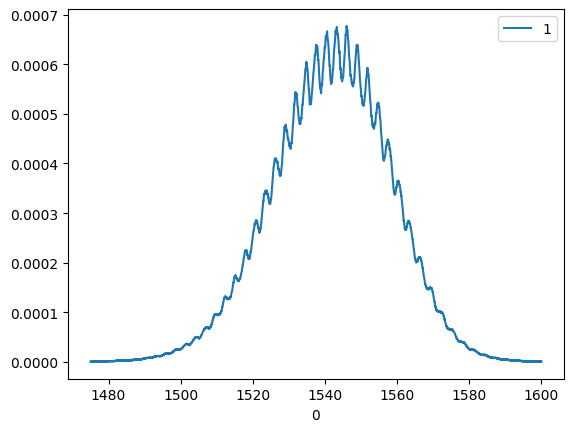

In [15]:
df_list[0].astype(float).plot(x=0, y=1)

In [36]:
fd_list[1]

'1.5'

In [42]:
# label
cls_list=[]

for i in range(len(fd_list)) :
  if float(fd_list[i]) < 1.3 :
    cls_list.append('Normal tissue')
  elif float(fd_list[i]) >= 1.3 and float(fd_list[i]) <1.32 :
    cls_list.append('CIN-1')
  elif float(fd_list[i]) >= 1.32 and float(fd_list[i])  <1.33 :
    cls_list.append('CIN-2')
  elif float(fd_list[i]) >= 1.33 and float(fd_list[i])  <1.38 :
    cls_list.append('CIN-3')
  elif float(fd_list[i]) >= 1.38 and float(fd_list[i])  <1.39 :
    cls_list.append('Cervical Cancer')
  i += 1

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
# split the data
x_train, x_test, y_train, y_test = train_test_split(df_list, fd_list, test_size=0.1)

nsamples, nx, ny = np.array(x_train).shape
d2_x_train = np.array(x_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x_test).shape
d2_x_test = np.array(x_test).reshape((nsamples,nx*ny))

# model
PCA = PCA(n_components = 5)
KNN = KNeighborsClassifier(n_neighbors = 5)
PCA_KNN = KNeighborsClassifier(n_neighbors = 5)
XGB = GradientBoostingClassifier(n_estimators=80, learning_rate=1.0, max_depth=1, random_state=0)
LDA = LinearDiscriminantAnalysis(n_components = 5)
RFC = RandomForestClassifier(max_depth=2, random_state=0)

#reshape
nsamples, nx, ny = np.array(x_train).shape
d2_x_train = np.array(x_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x_test).shape
d2_x_test = np.array(x_test).reshape((nsamples,nx*ny))

#Training PCA, LDA, KNN, XGB models
PCA_KNN.fit(PCA.fit_transform(d2_x_train), y_train)
LDA.fit(d2_x_train, y_train)
KNN.fit(d2_x_train, y_train)
XGB.fit(d2_x_train, y_train)
RFC.fit(d2_x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [45]:
# predict
pca_pred = PCA_KNN.predict(PCA.transform(d2_x_test))
knn_pred = KNN.predict(d2_x_test)
lda_pred = LDA.predict(d2_x_test)
xgb_pred = XGB.predict(d2_x_test)
rfc_pred = RFC.predict(d2_x_test)

In [46]:
# accuracy
print('PCA&KNN Acc : {}'.format(accuracy_score(y_test,pca_pred)))
print('KNN Acc : {}'.format(accuracy_score(y_test,knn_pred)))
print('LDA Acc : {}'.format(accuracy_score(y_test,lda_pred)))
print('XGB Acc : {}'.format(accuracy_score(y_test,xgb_pred)))
print('RFC Acc : {}'.format(accuracy_score(y_test,rfc_pred)))

PCA&KNN Acc : 0.6666666666666666
KNN Acc : 0.5
LDA Acc : 0.9166666666666666
XGB Acc : 0.625
RFC Acc : 0.6666666666666666


In [44]:
model_list = ["pca_pred", "knn_pred", "lda_pred","xgb_pred","rfc_pred"]
range(len(fd_list))

range(0, 231)

In [ ]:
# compare time
import time
import datetime # datetime 라이브러리 import

for i in
  start = time.time(pca_pred) # 시작
  time.sleep(pca_pred) # 수행시간 측정하고자 하는 코드 부분
  sec = time.time()-start # 종료 - 시작 (걸린 시간)

  times = str(datetime.timedelta(seconds=sec)) # 걸린시간 보기좋게 바꾸기
  short = times.split(".")[0] # 초 단위 까지만
  print(f"{times} sec")
  print(f"{short} sec")